#  Model Selection and Hyperparameter Tuning 

This notebook is based on 

Sebastian Raschka and Vahid Mirjalili **Python Machine Learning**, Third Edition 2019, Packt Publishing

**Chapter 6 - Learning Best Practices for Model Evaluation and Hyperparameter Tuning**

In [28]:
# Import necessary libraries
import numpy             as np   # For numerical operations
import matplotlib.pyplot as plt  # For plotting

from sklearn.datasets         import make_classification     # To create synthetic classification data
from sklearn.datasets         import make_regression
from sklearn.ensemble         import RandomForestClassifier  # Random Forest Classifier
from sklearn.model_selection  import learning_curve          # For computing learning curves
from sklearn.model_selection  import validation_curve        # For computing validation curves
from sklearn.model_selection  import train_test_split        # For splitting the dataset into training and test sets
from sklearn.linear_model     import LinearRegression
from sklearn.tree             import DecisionTreeRegressor

In [29]:
from IPython.display import Image
%matplotlib inline

## Introduction

Model selection is a fundamental step in the development of machine learning solutions. It involves choosing the most appropriate algorithm and hyperparameters to achieve the best generalization performance on unseen data. Selecting an appropriate model is not merely about choosing the most complex or powerful algorithm but about balancing bias and variance while ensuring the model is neither underfitting nor overfitting the data.

### Theoretical Foundations

The process of model selection requires evaluating multiple candidate models based on their ability to generalize. A key consideration is the **bias-variance tradeoff**: models with high bias tend to underfit the data, failing to capture its complexity, whereas models with high variance tend to overfit, capturing noise rather than meaningful patterns. The goal is to identify a model that achieves an optimal balance between these two extremes.

A common approach to model selection relies on **cross-validation**, a technique that partitions the data into training and validation subsets multiple times to assess the model’s performance robustly. **K-fold cross-validation** is one of the most widely used methods, where the dataset is divided into *k* subsets, training occurs on *k-1* folds, and the remaining fold is used for validation. This process repeats *k* times, and the results are averaged to estimate the model’s performance.

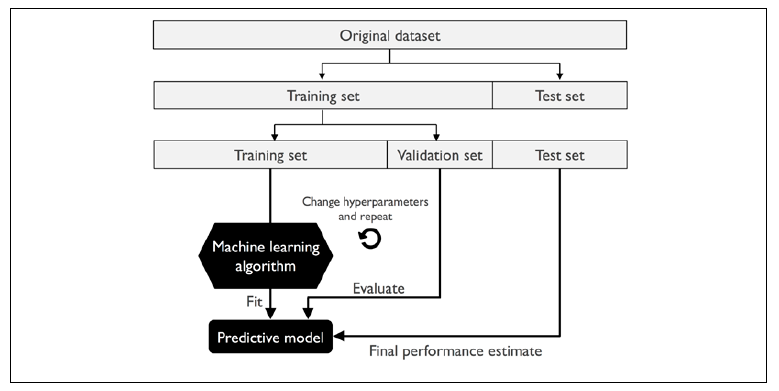

In [30]:
Image(filename='../05-pictures/lesson-4-2_pic_0.png', width=800) 

*Source: Raschka S. et al. - Python Machine Learning - Chapter 6 (see Reference and Credits section)*

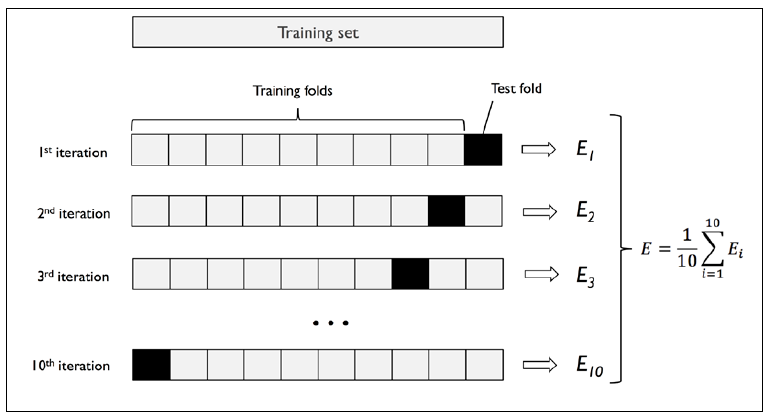

In [31]:
Image(filename='../05-pictures/lesson-4-2_pic_1.png', width=800) 

*Source: Raschka S. et al. - Python Machine Learning - Chapter 6 (see Reference and Credits section)*

### Practical Model Selection Using Python

To illustrate model selection in practice, we can compare different machine learning models using cross-validation. Consider the task of predicting housing prices using the `scikit-learn` library.

> **NOTE: What Does cross_val_score Do?**
> - It splits the dataset into multiple subsets (or "folds").
> - It trains the model on some folds and tests it on the remaining fold.
> - It repeats this process multiple times, ensuring that every data point gets to be in a test set once.
> - It returns an array of scores, one for each fold, which can then be averaged to get a final evaluation.
>
> For Example, if cv=5, the dataset is split into 5 equal parts (folds):
>
> - Train on folds 1-4, test on fold 5
> - Train on folds 1, 2, 3, 5, test on fold 4
> - Train on folds 1, 2, 4, 5, test on fold 3
> - Train on folds 1, 3, 4, 5, test on fold 2
> - Train on folds 2-5, test on fold 1
>
>Each fold gets a chance to be in the test set once, making the evaluation more robust.

Evaluating models: 100%|█████████████████████████████████████████████████████████████████| 2/2 [01:31<00:00, 45.54s/it]


               Model  R^2 Score
0  Linear Regression   0.611484
1      Random Forest   0.804153
Total execution time: 91.08 seconds


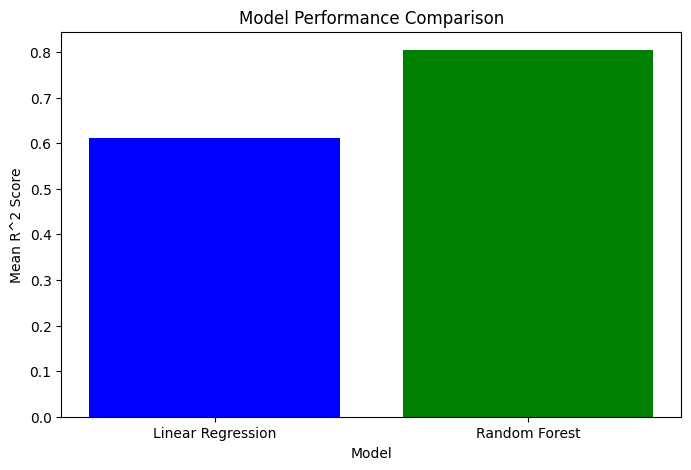

In [32]:
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from tqdm import tqdm  # Library for progress bar

# Load the California housing dataset
# This dataset contains housing data for California, with features such as median income, house age, etc.
housing = fetch_california_housing()
X, y = housing.data, housing.target  # Features (X) and target variable (y)

# Split data into training and test sets (80% training, 20% test)
# This helps evaluate model generalization on unseen data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define different models to compare
# We include Linear Regression, Random Forest, and Support Vector Machine
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
}

# Dictionary to store cross-validation results
results = {}

# Measure execution time for model selection process
start_time = time.time()

# Evaluate models using cross-validation with a progress bar
for name, model in tqdm(models.items(), desc="Evaluating models"):
    # Perform 5-fold cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    
    # Store the mean R^2 score for each model
    results[name] = np.mean(scores)

# Measure total execution time
end_time = time.time()
execution_time = end_time - start_time

# Convert results dictionary to DataFrame for better readability
results_df = pd.DataFrame(list(results.items()), columns=["Model", "R^2 Score"])

# Print results
print(results_df)

# Print execution time
print(f"Total execution time: {execution_time:.2f} seconds")

# Optional: Visualize the results
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red'])
plt.xlabel("Model")
plt.ylabel("Mean R^2 Score")
plt.title("Model Performance Comparison")
plt.show()

In this example, two different models — **Linear Regression** and **Random Forest** — are evaluated using 5-fold cross-validation. The performance of each model is measured using the coefficient of determination (R² score), which indicates how well the model explains the variance in the target variable.

### Interpretation of Results

After executing the above script, we obtain R² scores for each model, allowing us to compare their generalization ability. If one model consistently achieves a higher score across validation folds, it suggests a better fit to the data. However, model selection is not solely about achieving the highest validation score; considerations such as interpretability, computational efficiency, and robustness to new data also play a crucial role.

For instance, if the dataset is small and interpretability is important, a linear regression model might be preferable due to its simplicity. Conversely, if prediction accuracy is the priority and computational resources permit, an ensemble model like Random Forest may be the best choice.

### Hyperparameter Tuning in Model Selection

Beyond selecting the best algorithm, adjusting hyperparameters is essential for optimizing model performance. This process, known as **hyperparameter tuning**, can be automated using techniques like **grid search** and **random search**.

```python
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}

# Perform grid search
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Display best parameters
print("Best Parameters:", grid_search.best_params_)
```

This script searches for the optimal combination of hyperparameters for a Random Forest model using **GridSearchCV**, which systematically evaluates different parameter settings and selects the combination yielding the best cross-validation performance.

Model selection is a critical aspect of machine learning that extends beyond merely choosing an algorithm. It involves balancing complexity, generalization ability, and computational efficiency. Techniques such as cross-validation provide reliable estimates of model performance, while hyperparameter tuning further refines the selected model. By integrating these techniques, practitioners can systematically approach model selection to achieve robust and interpretable predictive solutions.

### A Quick Remind about Pipelines

Scikit-learn **pipelines** provide a streamlined way to chain multiple preprocessing steps and a machine learning model into a single workflow. This makes code cleaner, ensures that transformations are correctly applied to both training and test data, and simplifies hyperparameter tuning.

**Basic Structure of a Pipeline**

A pipeline consists of a sequence of transformations (e.g., scaling, encoding) followed by a final estimator (e.g., a regression or classification model). The pipeline ensures that all preprocessing steps are applied consistently.

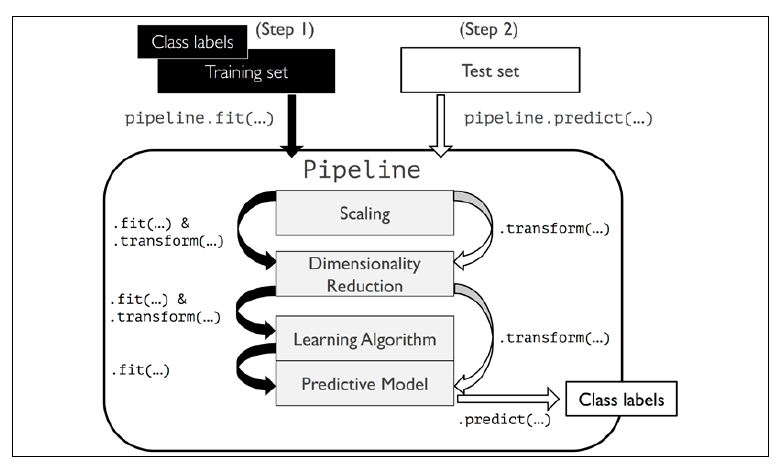

In [34]:
Image(filename='../05-pictures/lesson-4-2_pic_2.png', width=600) 

*Source: Raschka S. et al. - Python Machine Learning - Chapter 6 (see Reference and Credits section)*

**Why Use Pipelines?**

1. **Prevents data leakage**: Ensures preprocessing steps are only fitted on training data and applied consistently to test data.

2. **Code clarity**: Organizes multiple steps in a structured manner.

3. **Hyperparameter tuning**: Easily integrates with `GridSearchCV` or `RandomizedSearchCV` for optimization.

Pipelines are especially useful for handling complex workflows, including feature selection, transformations, and model training, in a consistent and reproducible manner.

## Learning Curve

### Introduction

When selecting a machine learning model, one of the critical considerations is understanding how the model’s performance evolves as it is exposed to more training data. This concept is best captured through **learning curves**, which illustrate the relationship between model performance (e.g., error rate or accuracy) and the size of the training dataset. Learning curves provide crucial insights into underfitting, overfitting, and the expected benefits of acquiring additional data.

### Theoretical Foundation

A learning curve is a graphical representation of how a model’s error metrics change with increasing training data. Typically, two curves are plotted:

1. **Training Error Curve**: This represents the error of the model on the training dataset. Initially, with a small amount of data, the training error is low because the model can fit the limited number of points easily. As more data is added, the model must generalize better, which may slightly increase training error.
   
2. **Validation Error Curve**: This indicates how well the model performs on unseen data. Initially, when training data is limited, the validation error tends to be high due to underfitting. As training data increases, the validation error generally decreases until it stabilizes.

By analyzing the trends in these curves, one can diagnose different learning behaviors:
- **Underfitting** occurs when both training and validation errors are high. This suggests that the model is too simple and incapable of capturing underlying patterns in the data.
- **Overfitting** occurs when training error is very low while validation error remains significantly higher. This indicates that the model has learned noise from the training data instead of generalizable patterns.
- **Optimal Capacity** is achieved when both training and validation errors converge to a stable point, indicating a model that generalizes well to unseen data.

### Visualizing Learning Curves in Python
To better understand these concepts, let us generate learning curves using Python. We will use a synthetic dataset and compare a simple linear model with a more complex one.

In [35]:
# Generate synthetic data
X, y = make_regression(n_samples=1000, n_features=1, noise=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Function to plot learning curves
def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_mean_squared_error')
    train_mean = -np.mean(train_scores, axis=1)
    test_mean = -np.mean(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean, label='Training Error')
    plt.plot(train_sizes, test_mean, label='Validation Error')
    plt.xlabel("Training Size")
    plt.ylabel("Mean Squared Error")
    plt.title(title)
    plt.legend()
    plt.show()

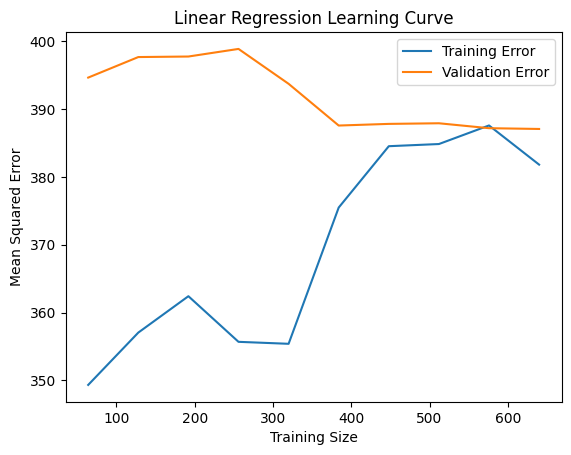

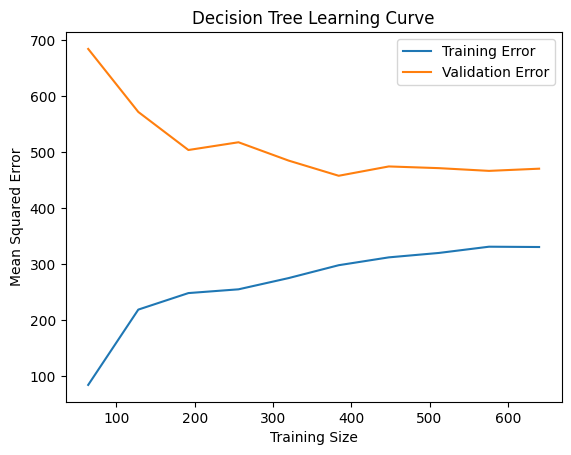

In [37]:
# Plot learning curves for linear regression
plot_learning_curve(LinearRegression(), X_train, y_train, "Linear Regression Learning Curve")

# Plot learning curves for decision tree
plot_learning_curve(DecisionTreeRegressor(max_depth=5), X_train, y_train, "Decision Tree Learning Curve")

### Interpretation of the Results

From the learning curves generated above, we observe distinct behaviors:

- The **linear regression model** generally exhibits high bias, meaning that both training and validation errors tend to remain high. This suggests underfitting and indicates that a more complex model might be necessary.

- The **decision tree model** has a very low training error but a much higher validation error, suggesting overfitting. The model learns the training data too well but struggles to generalize to new data.

### Practical Implications
Understanding learning curves is essential when selecting a model for a given task. If a model is underfitting, one might consider increasing its complexity or using feature engineering to improve representation. Conversely, if a model is overfitting, strategies such as regularization, pruning (for decision trees), or increasing the amount of training data can help improve generalization.

Additionally, learning curves provide guidance on whether collecting more data would be beneficial. If both training and validation errors continue to decrease as data increases, acquiring additional data could enhance performance. However, if the validation error plateaus, adding more data may not significantly improve results, and attention should be shifted to model selection and optimization.

### Conclusion
Learning curves offer a powerful tool for diagnosing and improving machine learning models. By carefully analyzing how performance evolves with increasing data, practitioners can make informed decisions about model complexity, data collection strategies, and the need for regularization techniques. As illustrated through the Python examples, visualizing learning curves can provide clear evidence of model behavior, aiding in the development of robust and generalizable machine learning solutions.

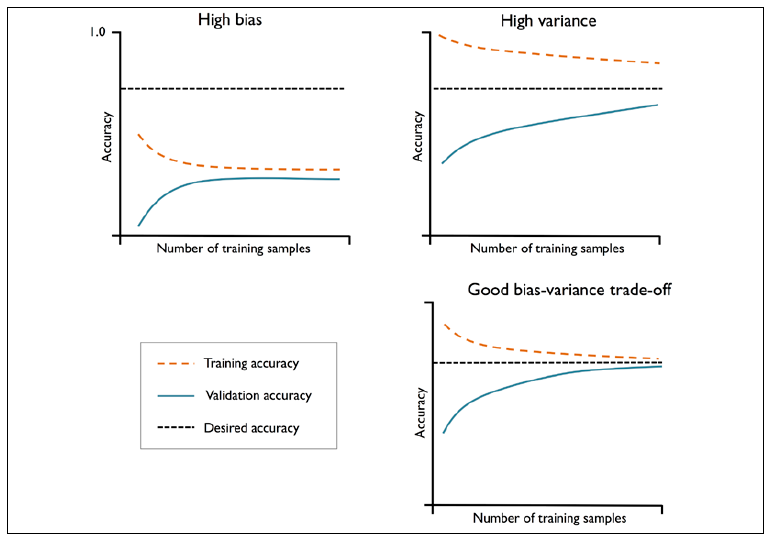

In [38]:
Image(filename='../05-pictures/lesson-4-2_pic_3.png', width=800) 

*Source: Raschka S. et al. - Python Machine Learning - Chapter 6 (see Reference and Credits section)*

### An Example with Real Data

In [39]:
import pandas as pd

df = pd.read_csv(
'https://archive.ics.uci.edu/ml/'
'machine-learning-databases'
'/breast-cancer-wisconsin/wdbc.data',
header=None)

In [40]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [41]:
from sklearn.preprocessing import LabelEncoder

X = df.loc[:, 2:].values
y = df.loc[:, 1].values
print(y[:5])

['M' 'M' 'M' 'M' 'M']


In [42]:
le = LabelEncoder()
y  = le.fit_transform(y)
print(y[:5])
le.classes_

[1 1 1 1 1]


array(['B', 'M'], dtype=object)

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=1)

In [44]:
from sklearn.preprocessing   import StandardScaler
from sklearn.linear_model    import LogisticRegression
from sklearn.pipeline        import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
    LogisticRegression(penalty='l2',
    random_state=1,
    solver='lbfgs',
    max_iter=10000))

train_sizes, train_scores, test_scores =\
    learning_curve(estimator=pipe_lr,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(
    0.1, 1.0, 10),
    cv=10,
    n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

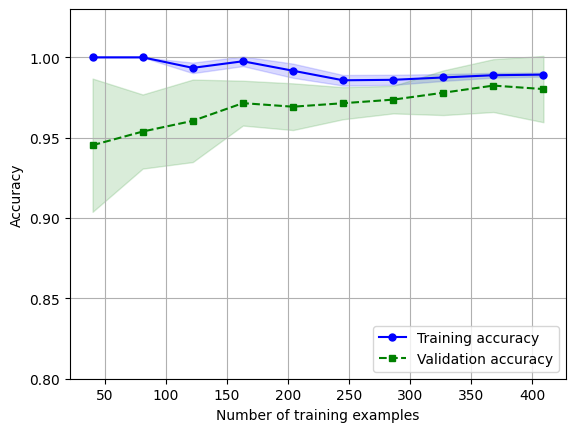

In [45]:
plt.plot(train_sizes, train_mean,
    color='blue', marker='o',
    markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
    train_mean + train_std,
    train_mean - train_std,
    alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
    color='green', linestyle='--',
    marker='s', markersize=5,
    label='Validation accuracy')

plt.fill_between(train_sizes,
    test_mean + test_std,
    test_mean - test_std,
    alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.show()

## Validation Curve

As we have already said, selecting an optimal machine learning model requires not only choosing the right algorithm but also fine-tuning its hyperparameters. One of the most effective ways to assess the influence of hyperparameters on model performance is through **validation curves**. A validation curve is a diagnostic tool that helps in understanding how a model behaves with varying hyperparameter values, allowing practitioners to detect underfitting and overfitting.

### Theoretical Background

A validation curve plots a model’s performance against different values of a specific hyperparameter. Typically, two curves are plotted: one for training scores and another for validation scores. The key idea behind validation curves is to analyze how the model’s generalization capability changes as the hyperparameter is modified.

When interpreting a validation curve, three possible patterns can emerge:
- **Underfitting**: If both the training and validation scores are low and close to each other, the model is too simple and fails to capture the complexity of the data.
- **Overfitting**: If the training score is high while the validation score is significantly lower, the model is too complex and memorizes the training data rather tha generalizing well.
- **Optimal Generalization**: If both training and validation scores are high and close to each other, the model has achieved a good balance between bias and variance.

Understanding validation curves is crucial in model selection, as they allow one to determine which hyperparameter values provide the best trade-off between underfitting and overfitting.

### Implementing Validation Curves in Python

To illustrate the concept, let us use the `validation_curve` function from `sklearn.model_selection`. This function allows us to compute training and validation scores for different hyperparameter values. We will use the **Random Forest Regressor** to explore how its performance changes with respect to the `max_depth` hyperparameter.

Computing validation curve: 100%|██████████████████████████████████████████████████████| 20/20 [17:46<00:00, 53.34s/it]


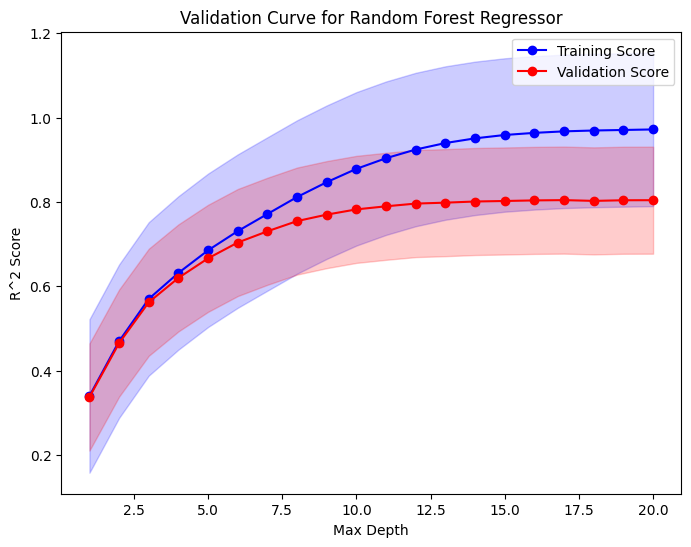

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  # Importing tqdm for progress bar
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, validation_curve

# Load the California housing dataset
housing = fetch_california_housing()

# Extract features (X) and target variable (y)
X, y = housing.data, housing.target  

# Split dataset into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the range of values for the hyperparameter (max_depth of the decision trees)
param_range = np.arange(1, 21)  # Testing max_depth

# Initialize lists to store scores for progress bar visualization
train_scores_list = []
val_scores_list = []

# Iterate through the parameter range with a progress bar
for max_depth in tqdm(param_range, desc="Computing validation curve"):
    # Compute validation curve for the current hyperparameter value
    train_scores, val_scores = validation_curve(
        RandomForestRegressor(), X_train, y_train,
        param_name="max_depth", param_range=[max_depth], cv=5, scoring="r2"
    )
    
    # Append mean scores to lists for plotting later
    train_scores_list.append(train_scores.mean())
    val_scores_list.append(val_scores.mean())

# Convert lists to NumPy arrays for easier manipulation
train_mean = np.array(train_scores_list)
val_mean = np.array(val_scores_list)

# Compute standard deviation for confidence intervals
train_std = np.std(train_scores_list)
val_std = np.std(val_scores_list)

# Plot validation curve
plt.figure(figsize=(8, 6))
plt.plot(param_range, train_mean, label="Training Score", marker='o', color='blue')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.plot(param_range, val_mean, label="Validation Score", marker='o', color='red')
plt.fill_between(param_range, val_mean - val_std, val_mean + val_std, alpha=0.2, color='red')

# Labels and title for the plot
plt.xlabel("Max Depth")  # Label for the x-axis
plt.ylabel("R^2 Score")  # Label for the y-axis
plt.title("Validation Curve for Random Forest Regressor")  # Plot title
plt.legend()  # Show the legend
plt.show()  # Display the plot


### Interpreting the Validation Curve

The plot generated from the above code provides insights into the effect of `max_depth` on model performance. If `max_depth` is too low, both training and validation scores remain low, indicating underfitting. As `max_depth` increases, the training score improves significantly. However, if the validation score peaks and then starts declining while the training score continues to rise, this suggests that the model is beginning to overfit. The ideal value for `max_depth` is found where the validation score is maximized before overfitting begins.

### Practical Applications

Validation curves are useful in several scenarios:
- **Hyperparameter tuning**: By visualizing how a specific hyperparameter affects performance, one can make informed decisions about its optimal value.
- **Detecting overfitting and underfitting**: If the gap between training and validation scores is large, the model may be overfitting, requiring regularization techniques.
- **Improving generalization**: Understanding the behavior of the model with different hyperparameters helps in selecting configurations that generalize well to unseen data.

## Grid Search

Fine-tuning process involves selecting the best hyperparameters, which define how the learning algorithm behaves. Unlike model parameters, which are learned from the data, hyperparameters are set manually before training begins. A systematic approach to tuning these hyperparameters is **grid search**, which evaluates a predefined set of hyperparameter values to determine the optimal combination for a given model.

### The Idea

Grid search involves exhaustively searching through a **grid** of possible hyperparameter values and selecting the combination that yields the best performance based on a chosen evaluation metric. The process typically involves:
1. Defining a set of hyperparameters and their possible values.
2. Training the model using each combination of these values.
3. Evaluating performance using cross-validation.
4. Selecting the combination that maximizes the desired metric (e.g., accuracy, R-squared, F1-score).

While grid search is computationally expensive, it provides a systematic way to explore hyperparameter space. When the number of possible hyperparameter combinations is very large, an alternative approach known as **random search** can be used to sample a subset of values instead of evaluating all possible configurations.

### Implementing Grid Search in Python

Scikit-learn provides a convenient implementation of grid search through `GridSearchCV`. Below is an example of fine-tuning a **Random Forest Regressor** using grid search.

In [46]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from tqdm import tqdm
import itertools

# Load dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model
rf = RandomForestRegressor(random_state=42)

# Define grid of hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20],     # Maximum depth of trees
    'min_samples_split': [2, 5, 10]  # Minimum samples required to split a node
}

# Calculate the total number of iterations
total_combinations = len(list(itertools.product(*param_grid.values()))) * 5  # cv=5

# Initialize tqdm progress bar
with tqdm(total=total_combinations, desc="Grid Search Progress") as pbar:
    def progress_callback(*args, **kwargs):
        pbar.update(1)  # Update progress bar after each fit iteration

    # Perform grid search with tqdm tracking
    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=0)
    grid_search.fit(X_train, y_train)
    pbar.close()  # Ensure progress bar is closed properly

# Display best parameters and corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best R^2 Score:", grid_search.best_score_)

Grid Search Progress:   0%|                                                                    | 0/135 [14:38<?, ?it/s]

Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best R^2 Score: 0.8050368931785936


After running the grid search, the output reveals the optimal combination of hyperparameters that achieved the highest cross-validation score. The selected values should then be used to retrain the model on the full training set before making final predictions.

Although grid search is a powerful tool, it has some limitations:

- **Computational Cost**: As the number of hyperparameters increases, the number of combinations grows exponentially, making exhaustive search impractical for large grids.

- **Curse of Dimensionality**: Some hyperparameters may be more influential than others, making it inefficient to search through all possible values blindly.

- **Alternative Approaches**: Methods like **random search** and **Bayesian optimization** can offer more efficient alternatives for hyperparameter tuning, especially when the search space is large.

## Reference and Credits

*Python Machine Learning 3rd Edition* by [Sebastian Raschka](https://sebastianraschka.com), Packt Publishing Ltd. 2019

Code Repository: https://github.com/rasbt/python-machine-learning-book-3rd-edition

Code License: [MIT License](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/LICENSE.txt)